# CSS5228 Final Project

In this notebook, we will start training our model

- Random Forest Base - MAE: 331763.892261509

In [152]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold

import matplotlib.pyplot as plt
import seaborn as sns

from utils import highlight_top, save_fig


In [101]:
df_train = pd.read_csv("../clean_data/train_preproc.csv", index_col=0)
df_test = pd.read_csv("../clean_data/test_preproc.csv", index_col=0)
df_submission = pd.read_csv("../raw_data/example-submission.csv")

In [154]:
sns.set_theme(style="ticks")
sns.set_context("paper", rc={"xtick.labelsize":15,
                             "ytick.labelsize":15,
                             "axes.titlesize":20,
                             "axes.labelsize":15})
default_col = '#4c72b0'
highlight_col = '#c44d52'

img_dir = Path("../images/")

## Model Training

### Base Random Forest

In [91]:
# Convert data to numpy arrays
X = df_train.drop("price", axis=1)
y = df_train["price"]

- We will start off with ensemble tree methods since it doesn't require standardization and performs relatively well.
- We will also be able to leverage on the feature importance function to have a sense of how each feature is performing

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_valid)))
print(len(X_valid), len(y_valid))

Size of training set: 16112
Size of test: 4029
4029 4029


In [120]:
fold_score = []
feat_importance = pd.DataFrame(index = X.columns)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [122]:
for fold, (train_idx, val_idx) in enumerate(k_fold.split(X, y)):
    
    print("\nFold {}".format(fold+1))
    X_train, y_train = X.iloc[train_idx,:], y[train_idx]
    X_val, y_val = X.iloc[val_idx,:], y[val_idx]
    print("Train shape: {}, {}, Valid shape: {}, {}".format(X_train.shape, y_train.shape, X_val.shape, y_val.shape))
    
    rf = RandomForestRegressor().fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    
    feat_importance["Importance_Fold"+str(fold)] = rf.feature_importances_
    
    mae_score = mean_absolute_error(y_val, y_pred)
    fold_score.append(mae_score)
    print("Validation MAE = {:.4f}".format(mae_score))
print("================================")
print("Average MAE = {}".format(np.mean(fold_score)))
    


Fold 1
Train shape: (16112, 25), (16112,), Valid shape: (4029, 25), (4029,)
Validation MAE = 331911.3233

Fold 2
Train shape: (16113, 25), (16113,), Valid shape: (4028, 25), (4028,)
Validation MAE = 318865.1651

Fold 3
Train shape: (16113, 25), (16113,), Valid shape: (4028, 25), (4028,)
Validation MAE = 333127.9052

Fold 4
Train shape: (16113, 25), (16113,), Valid shape: (4028, 25), (4028,)
Validation MAE = 383372.6274

Fold 5
Train shape: (16113, 25), (16113,), Valid shape: (4028, 25), (4028,)
Validation MAE = 321526.6496
Average MAE = 337659.89324484835


In [165]:
average_importance = np.mean(feat_importance, axis=1)
average_importance = average_importance.reset_index()
average_importance = average_importance.rename(columns={0:"mean_importance"})
average_importance["mean_importance"] = round(average_importance["mean_importance"], 5)
average_importance = average_importance.sort_values(by=["mean_importance"], ascending=False)

Saving figure planning_area_price


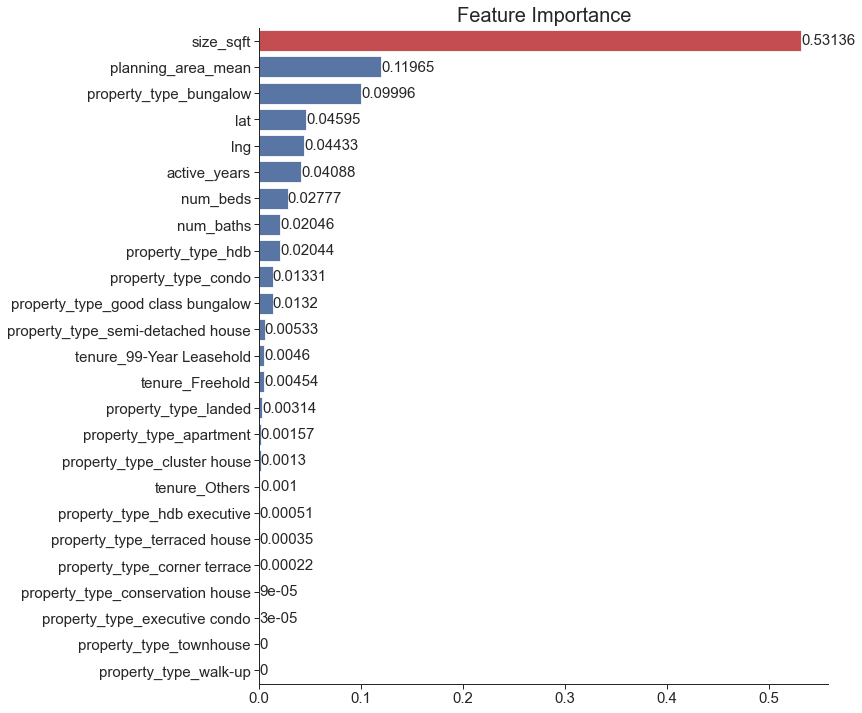

In [166]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x="mean_importance", y="index", data=average_importance, color=default_col)
ax.bar_label(ax.containers[0], fontsize=15)
sns.despine()
highlight_top(ax, "horizontal", highlight_col)
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("")
save_fig("planning_area_price", img_dir)
plt.show()


In [98]:
pred = rf.predict(df_test)

In [106]:
df_submission["Predicted"] = pred

In [110]:
df_submission.to_csv("../rf_base_submission.csv", index=0)